Project 2 Created by Maslin Farrell

Importing NumPy, MatPlotLib (for graphing), Pandas (for creating a results table), and mlp (textbook mlp.py)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mlp

Define Data

In [11]:
x = np.linspace(1,100,100).reshape((100,1))
y = np.random.randn(100).reshape(100,1)
t = np.sin(np.pi * 10 * x + 10/(1 + y**2)) + np.log(x**2 + y**2)

Plot the function

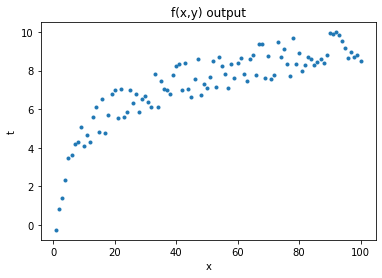

In [12]:
plt.plot(x, t, '.')
plt.title("f(x,y) output")
plt.xlabel('x')
plt.ylabel('t');

Setup the data for training. Uses the textbook 50:25:25 ratio 
50 for training using odd-elements, 25 even-elements for testing, rest for validation


In [13]:
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
trainTarget = t[0::2,:]
testTarget = t[1::4,:]
validTarget = t[3::4,:]

Train the model with the datasets we created, for a varying number of hidden neurons


In [14]:
ETA = .005 # Best learning rate (ETA) in terms of accuracy and time is 0.005 or 0.006. Test range was 0.25-0.004, the range 0.007-.005 is the sweet spot for this data. 
NETWORK_LAYERS = 2 # Controls number of network layers created.
NEURONS = [1,2,3,5,10,13,15,17,19] # Array of neurons, each index is the number of neurons in a single network layer. (This can be as big as you want or as small)

#Create a 2D list of mlp data types and convert it to a 2D numpy array
networkArr = [[mlp]*NETWORK_LAYERS]* len(NEURONS)
networkArr = np.array(networkArr)

output = np.zeros((len(NEURONS), NETWORK_LAYERS)) # populate output array with zeros and the shape we want for storing the results

#Create a 2D Array of networks with varying number of neurons: [[Network hidden layer 1 with 1 Neuron],[ Network hidden layer 2 with 1 neuron]], [[Network hidden layer 1 with 2 Neurons], [Network hidden layer 2 with 2 Neurons]]
for i in range(len(NEURONS)):
    for j in range(NETWORK_LAYERS):
        networkArr[i, j] = mlp.mlp(train, trainTarget, NEURONS[i], 'linear') # Create the hidden network layer with the current number of neurons
        networkArr[i, j].mlptrain(train, trainTarget, ETA, 101) # train the current hidden network layer
        output[i, j] = networkArr[i, j].earlystopping(train, trainTarget, valid, validTarget, ETA) # run earlystopping with the current hidden network layer


Iteration:  0  Error:  1176.0928751032172
Iteration:  100  Error:  102.59773231920434
1
Iteration:  0  Error:  102.58954969852797
2
Iteration:  0  Error:  102.20356852517565
3
Iteration:  0  Error:  101.80131009396797
4
Iteration:  0  Error:  100.99735774573759
5
Iteration:  0  Error:  95.0513254507663
6
Iteration:  0  Error:  82.45851446773945
7
Iteration:  0  Error:  55.9758648798966
8
Iteration:  0  Error:  34.30042584128079
9
Iteration:  0  Error:  25.81337127171758
10
Iteration:  0  Error:  22.945177785456025
11
Iteration:  0  Error:  21.853449113345555
Stopped 8.768832304119291 8.71247261888359 8.658561085920399
Iteration:  0  Error:  1650.4107386259698
Iteration:  100  Error:  88.02338519712458
1
Iteration:  0  Error:  87.99295114919364
2
Iteration:  0  Error:  57.414749503534495
3
Iteration:  0  Error:  36.036003098928454
4
Iteration:  0  Error:  26.974775942653622
5
Iteration:  0  Error:  23.700430523589326
6
Iteration:  0  Error:  22.42086026424173
Stopped 8.971048103953784 8

#### Training Results for a variable number of hidden neurons
Get the Mean, Max, Min error, and standard deviation of all the networks with varying number of hidden neurons and store to meanError, maxError, minError, stdDev arrays


 The meanError, maxError, minError, stdDev arrays work like this: meanError[0] = is the mean error of the first hidden network layer(s) with 1 hidden neuron each, meanError[1] is the mean error of the second hidden network layer(s) with 2 hidden neurons each, and so on. This pattern continues for max, min and stdDev.  This ensures you are calculating the results of the entire hidden network and not the mean error of only hidden network layer.

In [15]:

meanError = np.zeros(len(NEURONS))
for i in range(len(NEURONS)):
    meanError[i] = np.array(np.mean(output[i]))

stdDev = np.zeros(len(NEURONS))
for i in range(len(NEURONS)):
    stdDev[i] = np.array(np.var(output[i]))

maxError = np.zeros(len(NEURONS))
for i in range(len(NEURONS)):
    maxError[i] = np.array(np.max(output[i]))

minError = np.zeros(len(NEURONS))
for i in range(len(NEURONS)):
    minError[i] = np.array(np.min(output[i]))

Creating a table with the training results of each number of hidden neurons

In [16]:
resultsArray = np.array([meanError, stdDev, maxError, minError]) # Create an numpy array with all of the information    
trainingResults = pd.DataFrame(resultsArray, index=["Mean Error", "Std. Deviation", "Max Error", "Min Error"], columns=NEURONS) # Turn the results array into a table  
print("Accuracy results of the different amount of hidden neurons for a " + str(NETWORK_LAYERS)  + " layer network")
print("NOTE: A lower mean error is better")
trainingResults

Accuracy results of the different amount of hidden neurons for a 2 layer network
NOTE: A lower mean error is better


,1,2,3,5,10,13,15,17,19
Mean Error,8.869940,8.629881,5.200271,5.063132,4.939551,5.448271,5.195251,5.088416,5.094936
Std. Deviation,0.010223,0.128281,0.005572,0.009675,0.000011,0.242132,0.050197,0.004634,0.000746
Max Error,8.971048,8.988044,5.274915,5.161492,4.942867,5.940340,5.419299,5.156486,5.122245
Min Error,8.768832,8.271718,5.125628,4.964772,4.936235,4.956202,4.971204,5.020346,5.067626


In [17]:
bestNetI = np.argmin(meanError) # Get the index (i) of the best network from meanError (b/c meanError is found by getting the mean of two layers, we know the exact index to find the network we want)
bestNetJ = np.argmin(output[np.argmin(meanError)]) # Get the other index of the best network (b/c networkArr is a 2D array, we have the i index, we now need the j index)
bestNetObj = networkArr[bestNetI, bestNetJ] # Store the best network to bestNetObj
print(f"Run mlp forward using the most accurate network with {bestNetObj.nhidden} neurons")

testFixedInput = np.concatenate((test, -np.ones((np.shape(test)[0], 1))), axis=1) #This ugly beast adds a fixed input (-1) to each layer
fwdResults = bestNetObj.mlpfwd(testFixedInput) #store the results from running the network forward, this will be used to graph the approximation/generator function

Run mlp forward using the most accurate network with 10 neurons


Plot Approximation/Generator function

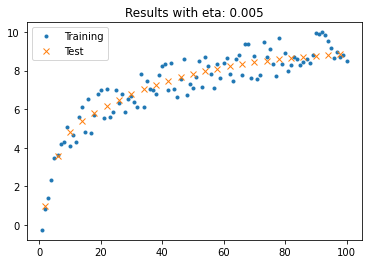

In [18]:
plt.plot(x, t, '.', test, fwdResults, 'x')
plt.title("Results with eta: " + str(ETA))
plt.legend(('Training', 'Test'));